In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [163]:
# load data
data=np.load('./mnist.npz')

X=data['x_train'].astype(float)
y=data['y_train']

In [164]:
# examine shapes and types
print(X.shape,X.dtype)
print(y.shape,y.dtype)

(60000, 28, 28) float64
(60000,) uint8


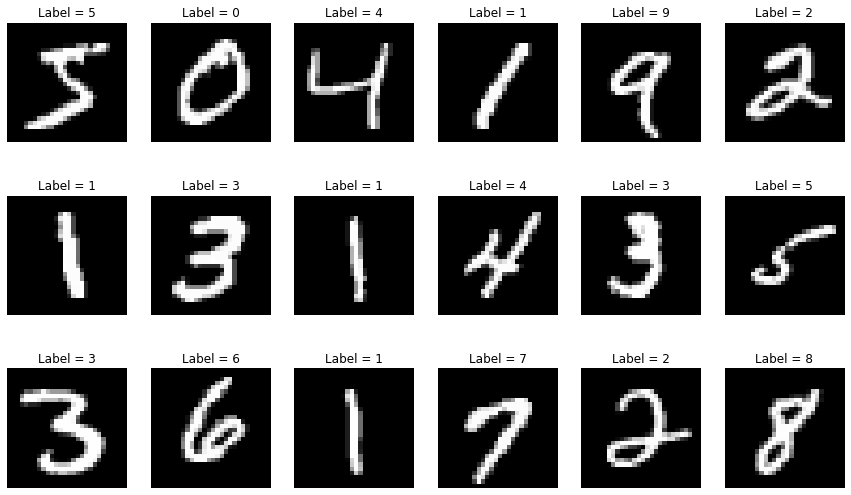

In [166]:
# visualize data
plt.figure(figsize=(15,9))

for i in range(18):
    digit = X[i,:,:]

    plt.subplot(3,6,i+1)    
    plt.imshow(digit, cmap='gray')
    plt.title(f'Label = {y[i]}')
    plt.axis('off')

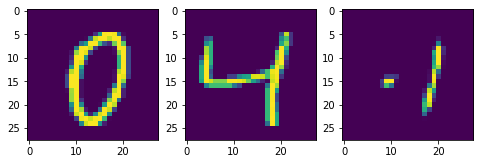

In [168]:
# visualize dot product
query=X[1000,:,:]
plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
plt.imshow(query);
plt.subplot(1,3,2)
plt.imshow(X[2,:,:]);
plt.subplot(1,3,3)
plt.imshow(query*X[2,:,:]);


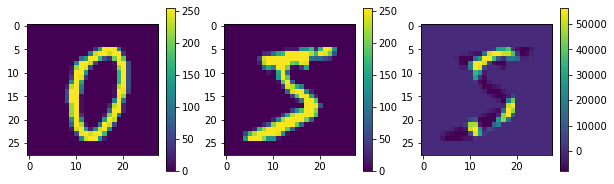

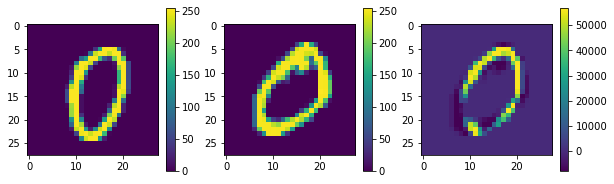

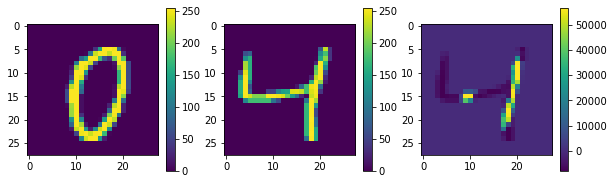

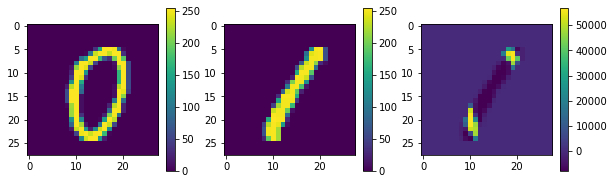

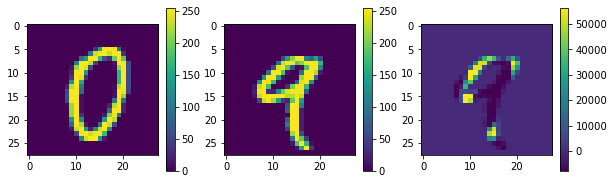

In [244]:
# visualize dot product for multiple examples
query=X[1000,:,:]
for i in range(0,5):
    plt.figure(figsize=(10,3))
    plt.subplot(1,3,1)
    plt.imshow(query);
    plt.colorbar()
    plt.subplot(1,3,2)
    plt.colorbar()
    plt.imshow(X[i,:,:]);
    plt.subplot(1,3,3)
    plt.imshow(  (query-np.mean(query))*X[i,:,:]     );
    plt.colorbar()


In [190]:
( query *X[0:20,:,:] ).sum(axis=(1,2) )


array([2375511., 3514321., 1565606., 1086610., 1804347., 2574475.,
       1073540., 3575255.,  656067., 1626132., 1941649.,  589280.,
       2517911., 2768966.,  594795., 1904152., 1321661., 1963348.,
       2047760.,  939752.])

In [192]:
np.argmax( (query*X[0:20,:,:]).sum(axis=(1,2) ) )


7

3


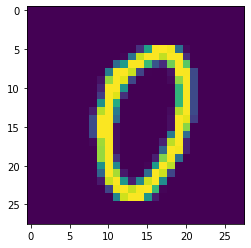

In [214]:
def find_label(query):
    similarity=query*X[0:20,:,:]
    ix=np.argmax(similarity.sum(axis=(1,2)))
    return y[ix]

query=X[1000,:,:]
plt.imshow(query)
print(find_label(query))

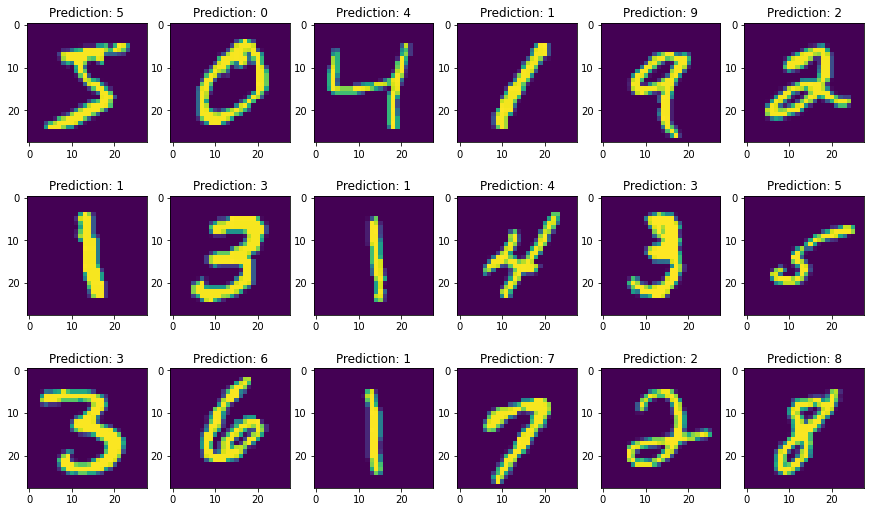

In [216]:
# try multiple queries
plt.figure(figsize=(15,9))

for i in range(18):
    query=X[1000+i,:,:]
    plt.subplot(3,6,i+1)
    plt.imshow(query)
    prediction=find_label(query)
    plt.title('Prediction: %d' % prediction)

In [256]:
# X[0:1000,:,:]-
np.mean(X[0:1000,:,:],axis=(1,2)).reshape((1000,1,1)).shape

(1000, 1, 1)

In [260]:
def find_label(query):
    #similarity=query*X[0:1000,:,:]
    similarity=(query-np.mean(query))*X[0:10000,:,:]
#     similarity=(query-np.mean(query))* (X[0:1000,:,:]-np.mean(X[0:1000,:,:],axis=(1,2)).reshape((1000,1,1))  )         
    
    ix=np.argmax(similarity.sum(axis=(1,2)))
    return y[ix]

# try multiple queries
l=[]

for i in range(1000):
    query=X[10000+i,:,:]
    prediction=find_label(query)
    ground_truth=y[10000+i]
    
    l.append( prediction==ground_truth )

print( np.mean(l) )

0.882
